Important Dependencies

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")

In [3]:
df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,2021-10-25 00:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,2021-10-25 00:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,2021-10-25 00:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


In [4]:
# Overview of numeric columns
print("The description of the numeric columns:")
df.describe()

The description of the numeric columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Summary Statistics & Missing-Value Report

In [5]:
#check for NaN values
# df.isna().sum()
print(df.isna().sum())
 # list any column with >5%   nulls
null_percent = df.isna().mean() * 100 

print('null_percent avarage',null_percent)
cols_over_5pct_nulls = null_percent[null_percent > 5 ]

print("Columns with >5% nulls:")
print(cols_over_5pct_nulls)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
null_percent avarage Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64
Columns with >5% nulls:
Comments    100.0
dtype: float64


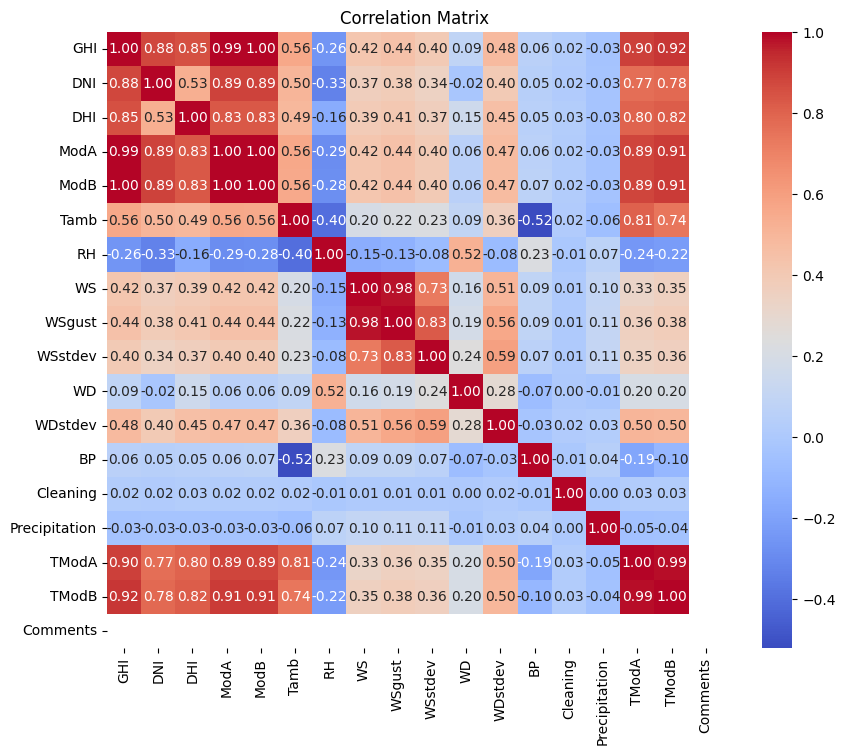

In [6]:
def plot_correlation_matrix(df):
    """
    Plot the correlation matrix of the dataset.

    """
    numeric_df = df.select_dtypes(include=[np.number]) # Only numeric columns
    
    plt.figure(figsize=(10, 8)) #Creates a new figure for plotting, with a size of 10 inches by 8 inches.
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(df)

In [7]:
#outliers for sensor readings
numeric_cols_sensor_readings = ['ModA', 'ModB']
z_scores = np.abs(stats.zscore(df[numeric_cols_sensor_readings]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged in sensor readongs: {outlier_flags.sum()}")


numeric_cols = ["GHI", "DNI","DHI", "ModA", "ModB", "WS", "WSgust"]


#Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3.

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_flags = (z_scores > 3).any(axis=0)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged in sensor readongs: 206
Number of outlier samples flagged: 7
